# Importing Necessary Packages

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

# Loading the data

In [ ]:
df1 = pd.read_csv("\insurance.csv")
df1.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Performing EDA on the  dataset

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [71]:
df1.shape

(1338, 7)

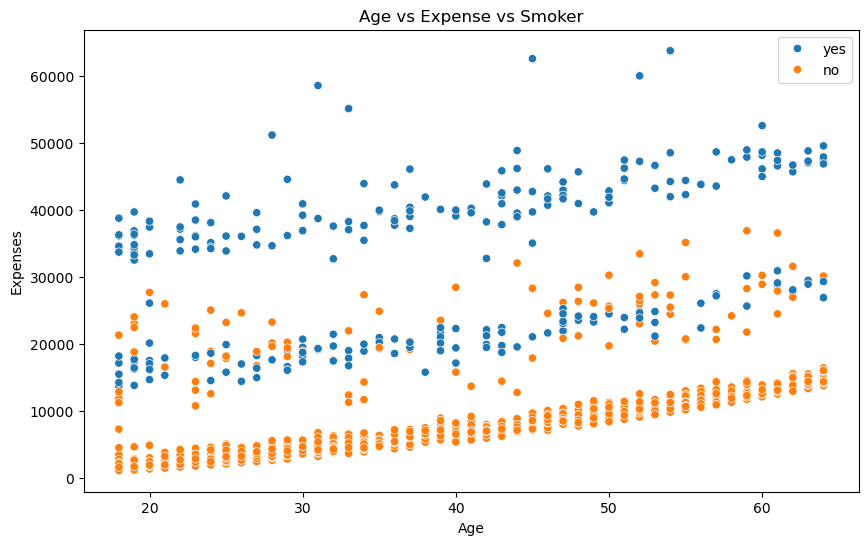

In [72]:
# Age vs Smoker vs Expense

plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='expenses', hue='smoker', data=df1)
plt.title("Age vs Expense vs Smoker")
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.legend()
plt.show()

C:\Users\pandi\AppData\Local\Temp\ipykernel_14496\1288475829.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='expenses', data=df1, palette='tab10')
C:\Users\pandi\AppData\Local\Temp\ipykernel_14496\1288475829.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


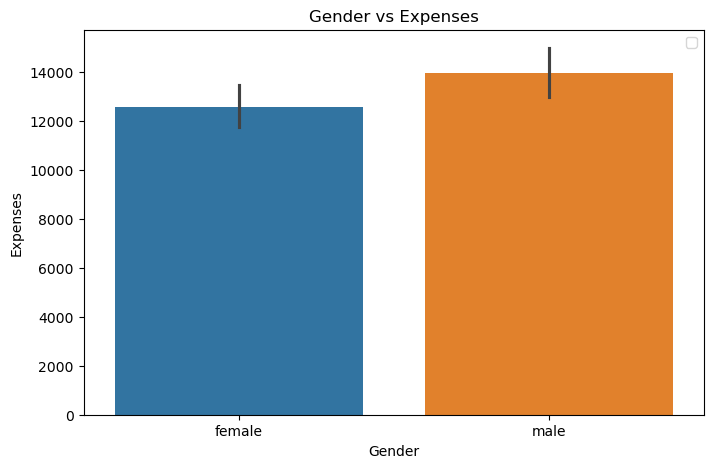

In [73]:
# Gender vs Expense

plt.figure(figsize=(8,5))
sns.barplot(x='sex', y='expenses', data=df1, palette='tab10')
plt.title("Gender vs Expenses")
plt.xlabel("Gender")
plt.ylabel("Expenses")
plt.legend()
plt.show()

C:\Users\pandi\AppData\Local\Temp\ipykernel_14496\2675021610.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='children', y='expenses', data=df1, palette='tab10')
C:\Users\pandi\AppData\Local\Temp\ipykernel_14496\2675021610.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


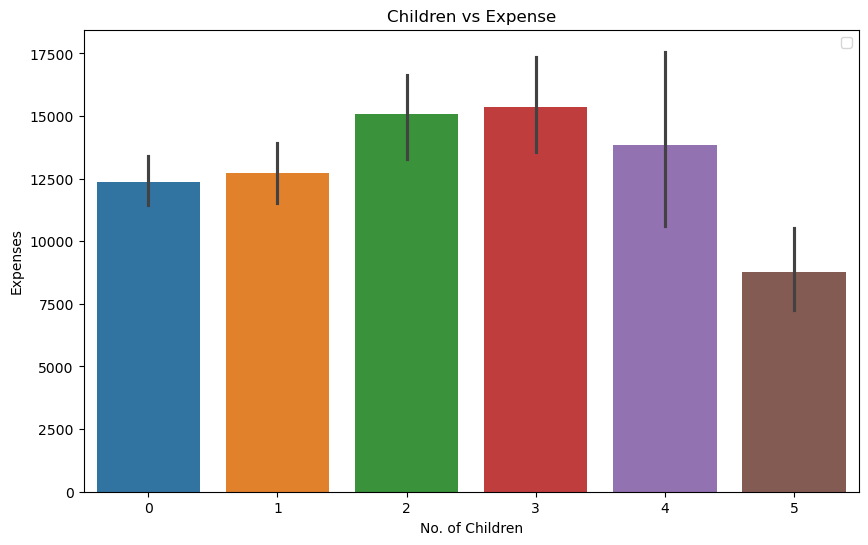

In [74]:
# Children vs Expense

plt.figure(figsize=(10,6))
sns.barplot(x='children', y='expenses', data=df1, palette='tab10')
plt.title("Children vs Expense")
plt.xlabel("No. of Children")
plt.ylabel("Expenses")
plt.legend()
plt.show()

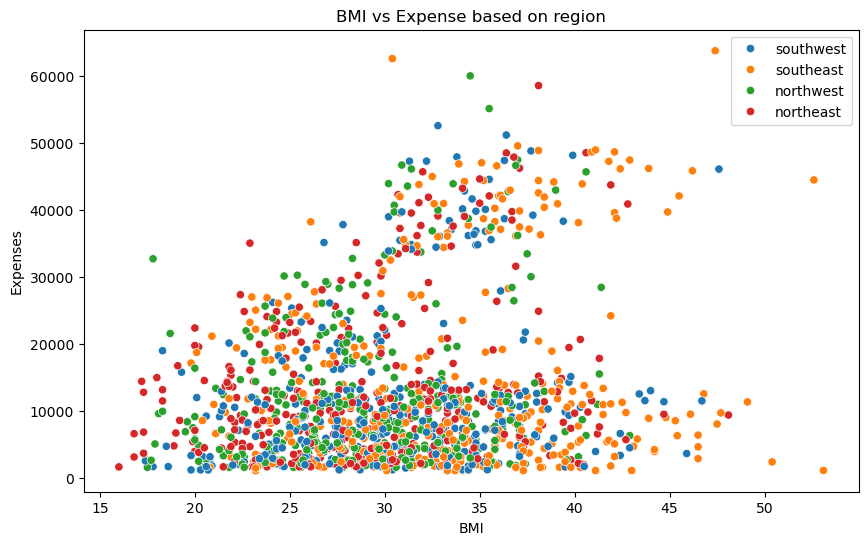

In [75]:
# BMI vs Expense based on region

plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='expenses', hue='region', data=df1)
plt.title("BMI vs Expense based on region")
plt.xlabel("BMI")
plt.ylabel("Expenses")
plt.legend()
plt.show()

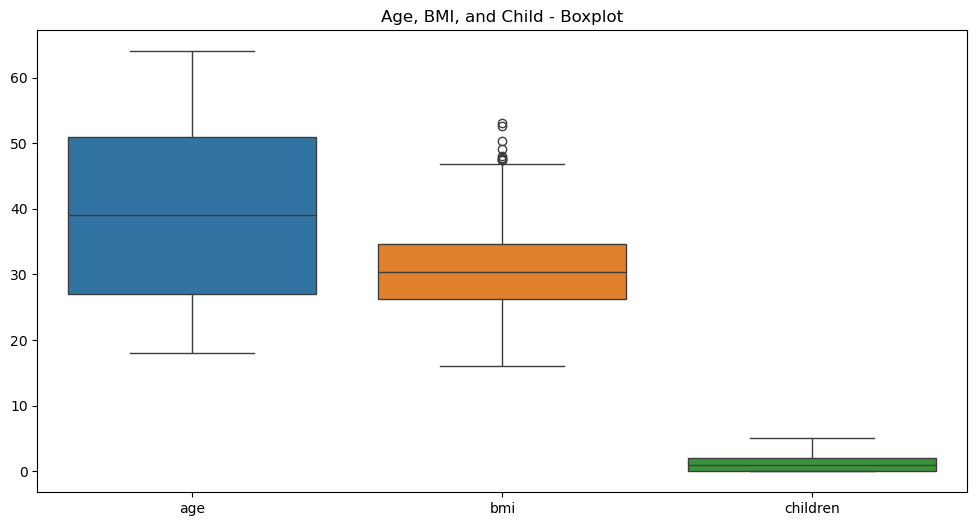

In [76]:
# Boxplot of the variables

plt.figure(figsize=(12,6))
sns.boxplot(df1[['age','bmi','children']])
plt.title("Age, BMI, and Child - Boxplot")
plt.show()

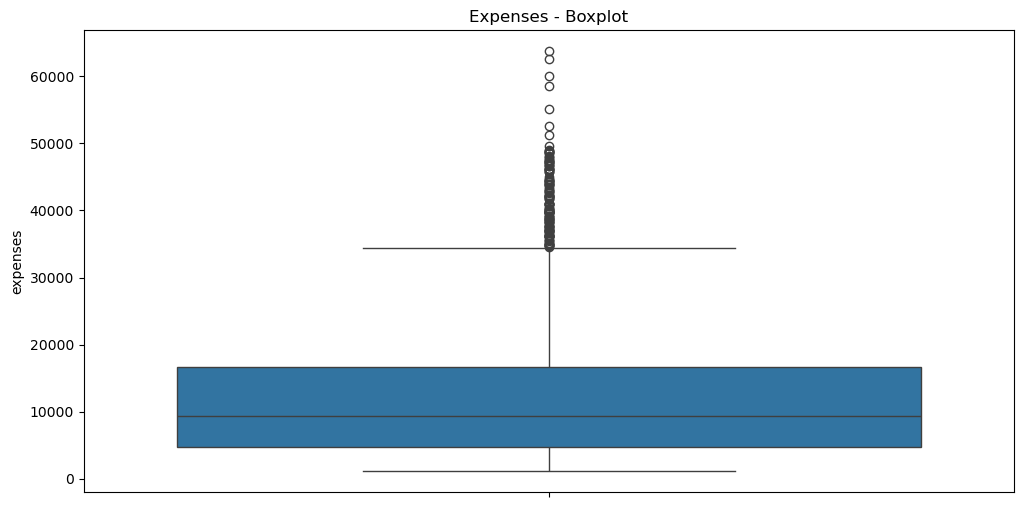

In [77]:
# Boxplot of target variable

plt.figure(figsize=(12,6))
sns.boxplot(df1['expenses'])
plt.title("Expenses - Boxplot")
plt.show()

In [78]:
num_cols = df1.select_dtypes(include=['int64','float64']).columns
cat_cols = df1.select_dtypes(exclude=['int64', 'float64']).columns

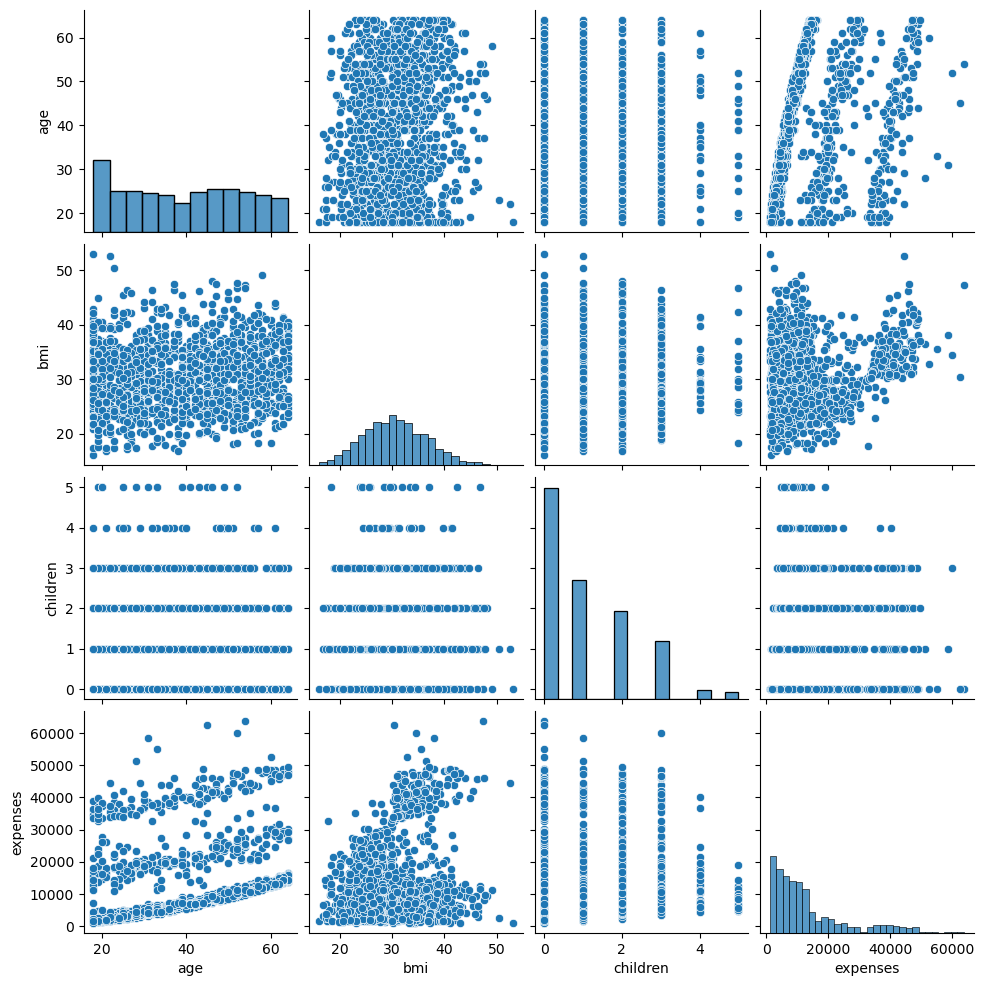

In [79]:
# Comparison of the all the numerical variables with smoker as hue

sns.pairplot(df1[num_cols])
plt.show()

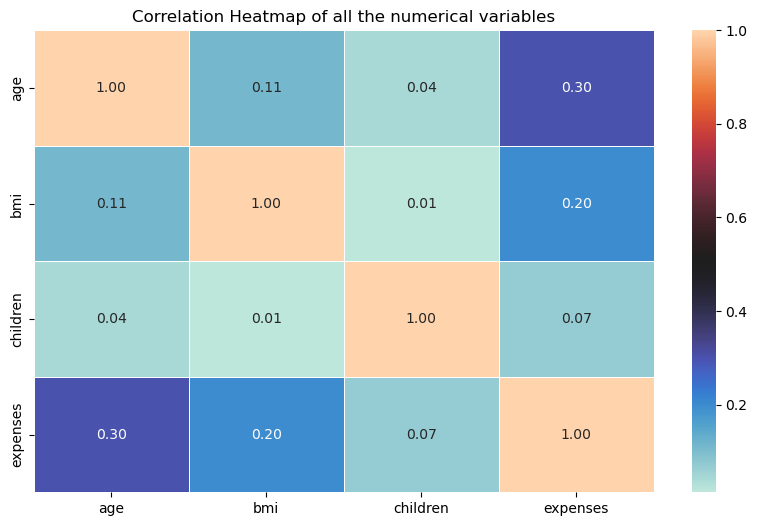

In [80]:
# Correlation heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='icefire', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of all the numerical variables")
plt.show()

# Handling Null values and outliers

In [81]:
df1.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

There isn't any null values in the dataset

In [82]:
df1.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<Axes: xlabel='age', ylabel='Count'>

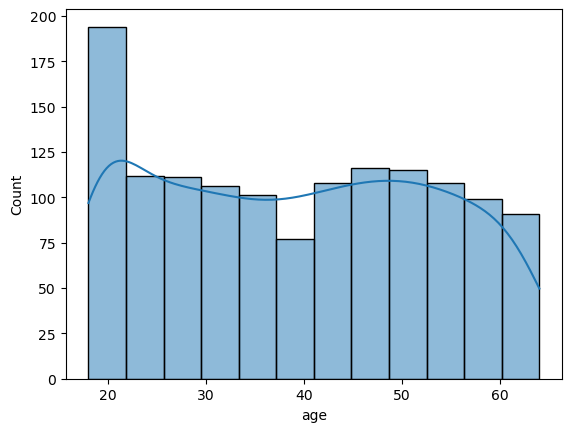

In [83]:
sns.histplot(df1['age'], kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

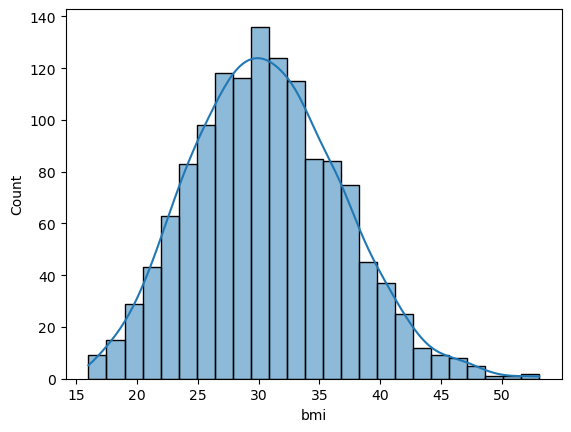

In [84]:
sns.histplot(df1['bmi'], kde=True)

<Axes: xlabel='children', ylabel='Count'>

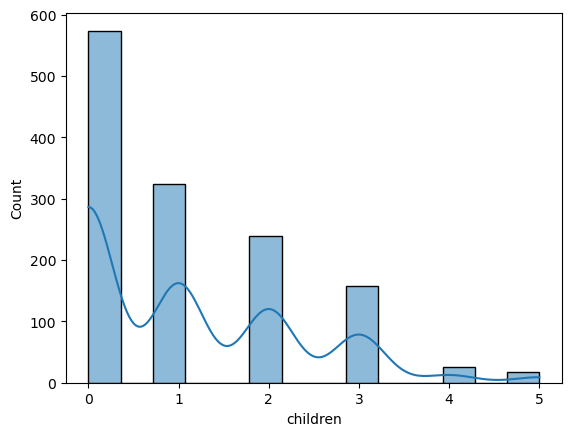

In [85]:
sns.histplot(df1['children'], kde=True)

<Axes: xlabel='expenses', ylabel='Count'>

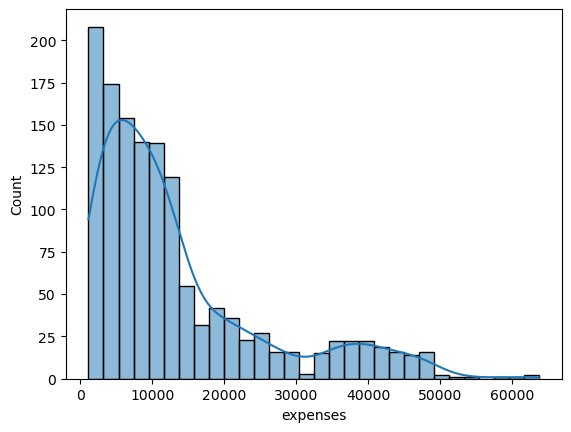

In [86]:
sns.histplot(df1['expenses'], kde=True)

In [87]:
def outlier_det(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return data[(data[column] < lower) | (data[column] > upper)] 

for col in num_cols:
    outliers = outlier_det(df1, col)
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers")

bmi: 9 outliers
expenses: 139 outliers


The target variable has considerable amount of outliers so we are log transforming the target variable

In [88]:
df1['log_expenses'] = np.log1p(df1['expenses'])

<Axes: xlabel='log_expenses', ylabel='Count'>

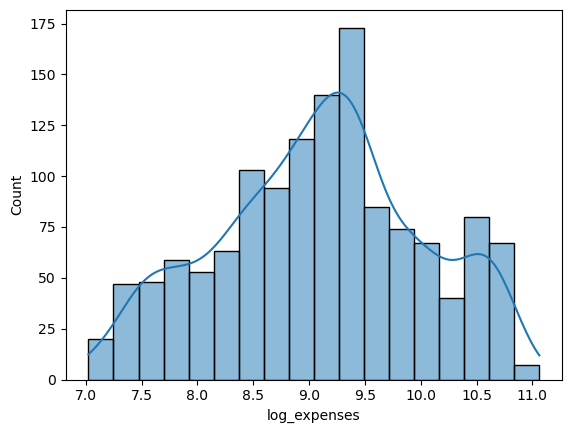

In [89]:
sns.histplot(df1['log_expenses'], kde=True)

# Feature Engineering

In [90]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [91]:
df1['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Considering the categorical columns one-hot encoding seems good here compared to label encoding

In [92]:
df1 = pd.get_dummies(df1, columns=cat_cols)

In [93]:
df1.head()

,age,bmi,children,expenses,log_expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,9.734235,True,False,False,True,False,False,False,True
1,18,33.8,1,1725.55,7.453880,False,True,True,False,False,False,True,False
2,28,33.0,3,4449.46,8.400763,False,True,True,False,False,False,True,False
3,33,22.7,0,21984.47,9.998137,False,True,True,False,False,True,False,False
4,32,28.9,0,3866.86,8.260457,False,True,True,False,False,True,False,False


# Creating the Model

In [94]:
# Splitting the dataset into train and test

df2 = df1.copy()

In [95]:
Y = df1['log_expenses']

df2.drop(columns=['expenses', 'log_expenses'], inplace= True)

X = df2

In [96]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2,  random_state=42)

In [97]:
# Scaling the features

from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
x_train_scaled = rs.fit_transform(x_train)

In [98]:
x_test_scaled = rs.transform(x_test)

In [99]:
# Creating the linear model

model = LinearRegression()

model.fit(x_train_scaled, y_train)

LinearRegression()

# Evaluating model performance

In [100]:
y_pred_log = model.predict(x_test_scaled)

y_pred = np.exp(y_pred_log)
y_actual = np.exp(y_test)

In [101]:
# Calculating rmse and r2

from sklearn.metrics import root_mean_squared_error, r2_score

rmse = root_mean_squared_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print(f"The Root Mean Squared Error of the Model is: {rmse}")
print(f"The R2 Score of the Model is: {r2}")

The Root Mean Squared Error of the Model is: 7813.94895190336
The R2 Score of the Model is: 0.6067098471133752


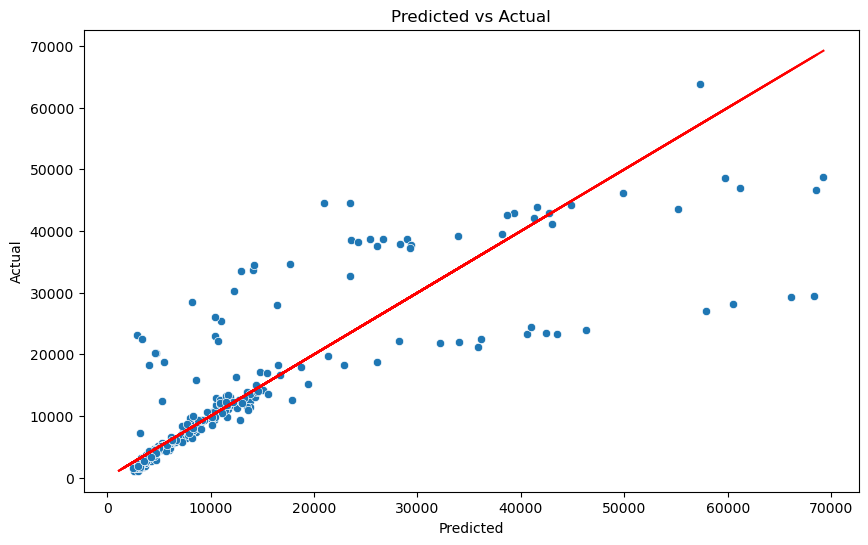

In [103]:
# Plotting actual value vs predicted value

plt.figure(figsize=(10,6))
sns.scatterplot(x = y_pred, y = y_actual)
plt.plot([y_pred, y_actual],
         [y_pred, y_actual],
         color='red')
plt.title("Predicted vs Actual")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()